# K najbliższych sąsiadów (KNN)
Algorytm ten służy do klasyfikowania różnych obiektów. Na podstawie tego algorytmu działa wiele sztucznych inteligencji służących właśnie do klasyfikowania .
Poniżej przedstawiłem przykład dla klasyfikacji zawierającej 2 punkty odniesienia (x i y), a następnie przykład jak obliczyć jak coś jest podobne do czegoś innego.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

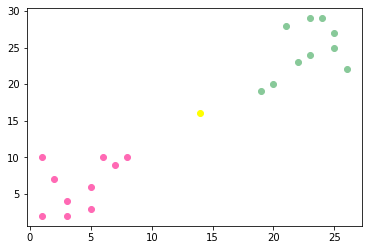

In [8]:
x1 = np.array([1, 6, 5, 7, 3, 5, 3, 2, 1, 8])
y1 = np.array([2, 10, 3, 9, 2, 6, 4, 7, 10, 10])
plt.scatter(x1, y1, color = 'hotpink')

x2 = np.array([20, 23, 23, 25, 19, 25, 24, 21, 22, 26])
y2 = np.array([20, 24, 29, 27, 19, 25, 29, 28, 23, 22])
plt.scatter(x2, y2, color = '#88c999')

x3 = np.array([14])
y3 = np.array([16])
plt.scatter(x3, y3, color = 'yellow')

plt.show()

#### Co trzeba zrobić?
Musimy do któregoś ze zbiorów przydzielić żółtą kropkę. Trzeba będzie to obliczyć ze wzoru:
$\lambda = \sqrt{(x_{1} - x_{2})^{2} + (y_{1} - y_{2})^{2}}$
<br> Na niebiesko zaznaczyłem obiekt najbardziej podobny do środkowego.

(19, 19, '#88c999', 5.830951894845301)


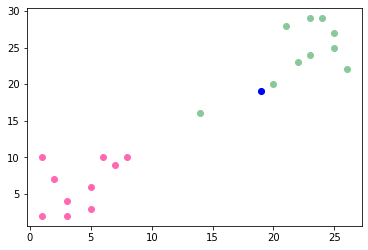

In [9]:
def selectRange(x1, x2, y1, y2):
    num1 = ((abs(x1 - x2))**2)
    num2 = ((abs(y1 - y2))**2)
    return math.sqrt(num1 + num2)

def classify():
    nearest = (0, 0, 0, float('inf'))
    for i in range(10):
        rangeToGreen = selectRange(x2[i], x3[0], y2[i], y3[0])
        rangeToPink = selectRange(x1[i], x3[0], y1[i], y3[0])
        if rangeToGreen < rangeToPink:
            if rangeToGreen < nearest[3]:
                nearest = (x2[i], y2[i], "#88c999", rangeToGreen)
        else:
            if rangeToPink < nearest[3]:
                nearest = (x1[i], y1[i], "hotpink", rangeToPink)
    return nearest

nearest = classify()
print(nearest)
plt.scatter(x1, y1, color = 'hotpink')
plt.scatter(x2, y2, color = '#88c999')
plt.scatter(nearest[0], nearest[1], color = 'blue')
plt.scatter(x3, y3, color = nearest[2])

plt.show()

##### Przykład gdy bliżej jest do różowego

(8, 10, 'hotpink', 7.0710678118654755)


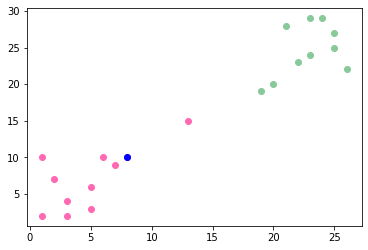

In [10]:
x3 = np.array([13])
y3 = np.array([15])
nearest = classify()
print(nearest)
plt.scatter(x1, y1, color = 'hotpink')
plt.scatter(x2, y2, color = '#88c999')
plt.scatter(nearest[0], nearest[1], color = 'blue')
plt.scatter(x3, y3, color = nearest[2])
plt.show()

### Jak bardzo są podobne do siebie dwa obiekty?

In [11]:
reference_points = {'a': [3, 4, 2], 'b': [4, 3, 5], 'c': [4, 5, 1], 'd': [1, 1, 5], 'e': [4, 5, 1]}
def visualisePoints():
    Visualise = pd.DataFrame.from_dict(reference_points, orient='index', columns=["Leon", "Michal", "Andrzej"])
    return Visualise

visualisePoints()

,Leon,Michal,Andrzej
a,3,4,2
b,4,3,5
c,4,5,1
d,1,1,5
e,4,5,1


##### Wzór:
$\lambda = \sqrt{(a_{1} - a_{2})^{2} + (b_{1} - b_{2})^{2} + (c_{1} - c_{2})^{2} + (d_{1} - d_{2})^{2} + (e_{1} - e_{2})^{2}}$

In [12]:
def selectRange(a1, a2, b1, b2, c1, c2, d1, d2, e1, e2):
    num1 = ((abs(a1 - a2))**2)
    num2 = ((abs(b1 - b2))**2)
    num3 = ((abs(c1 - c2))**2)
    num4 = ((abs(d1 - d2))**2)
    num5 = ((abs(e1 - e2))**2)
    return math.sqrt(num1 + num2 + num3 + num4 + num5)

def similarity(object1index, object2index):
    return selectRange(reference_points['a'][object1index], reference_points['a'][object2index], reference_points['b'][object1index], reference_points['b'][object2index], reference_points['c'][object1index] ,reference_points['c'][object2index], reference_points['d'][object1index], reference_points['d'][object2index], reference_points['e'][object1index], reference_points['e'][object2index])

print(f"Leon is similar to Miachal: {similarity(0, 1)}")
print(f"Leon is similar to Andrzej: {similarity(0, 2)}")
print(f"Michal is similar to Andrzej: {similarity(1, 2)}")

Leon is similar to Miachal: 2.0
Leon is similar to Andrzej: 6.0
Michal is similar to Andrzej: 7.483314773547883
